In [1]:
import napari
from napari.utils import nbscreenshot
from napari_matplotlib import HistogramWidget
from nap_plot_tools import CustomToolbarWidget
import numpy as np
import os
from pathlib import Path

c:\Users\mazo260d\mambaforge\envs\napari-ss-npt-dev\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
viewer = napari.Viewer()

plotter = HistogramWidget(viewer)

In [3]:
icon_folder_path = str(Path().parent.resolve().parent / 'icons')
icon_folder_path

'C:\\Users\\mazo260d\\Documents\\GitHub\\nap-plot-tools\\src\\nap_plot_tools\\icons'

In [4]:
custom_toolbar = CustomToolbarWidget()

In [5]:
def callback_function(state):
    if state:
        print('Selection Activated!')
    else:
        print('Selection Deactivated!')

In [6]:
 ### Add toolbuttons to toolbar ###
custom_toolbar.add_custom_button(name='select', tooltip="Select something", 
                                 default_icon_path=os.path.join(icon_folder_path, "select.png"),
                                 callback=callback_function, 
                                 checkable=True, 
                                 checked_icon_path=os.path.join(icon_folder_path, "select_checked.png"))

Add toolbar directly

In [7]:
viewer.window.add_dock_widget(custom_toolbar, area='right', name='custom_toolbar')

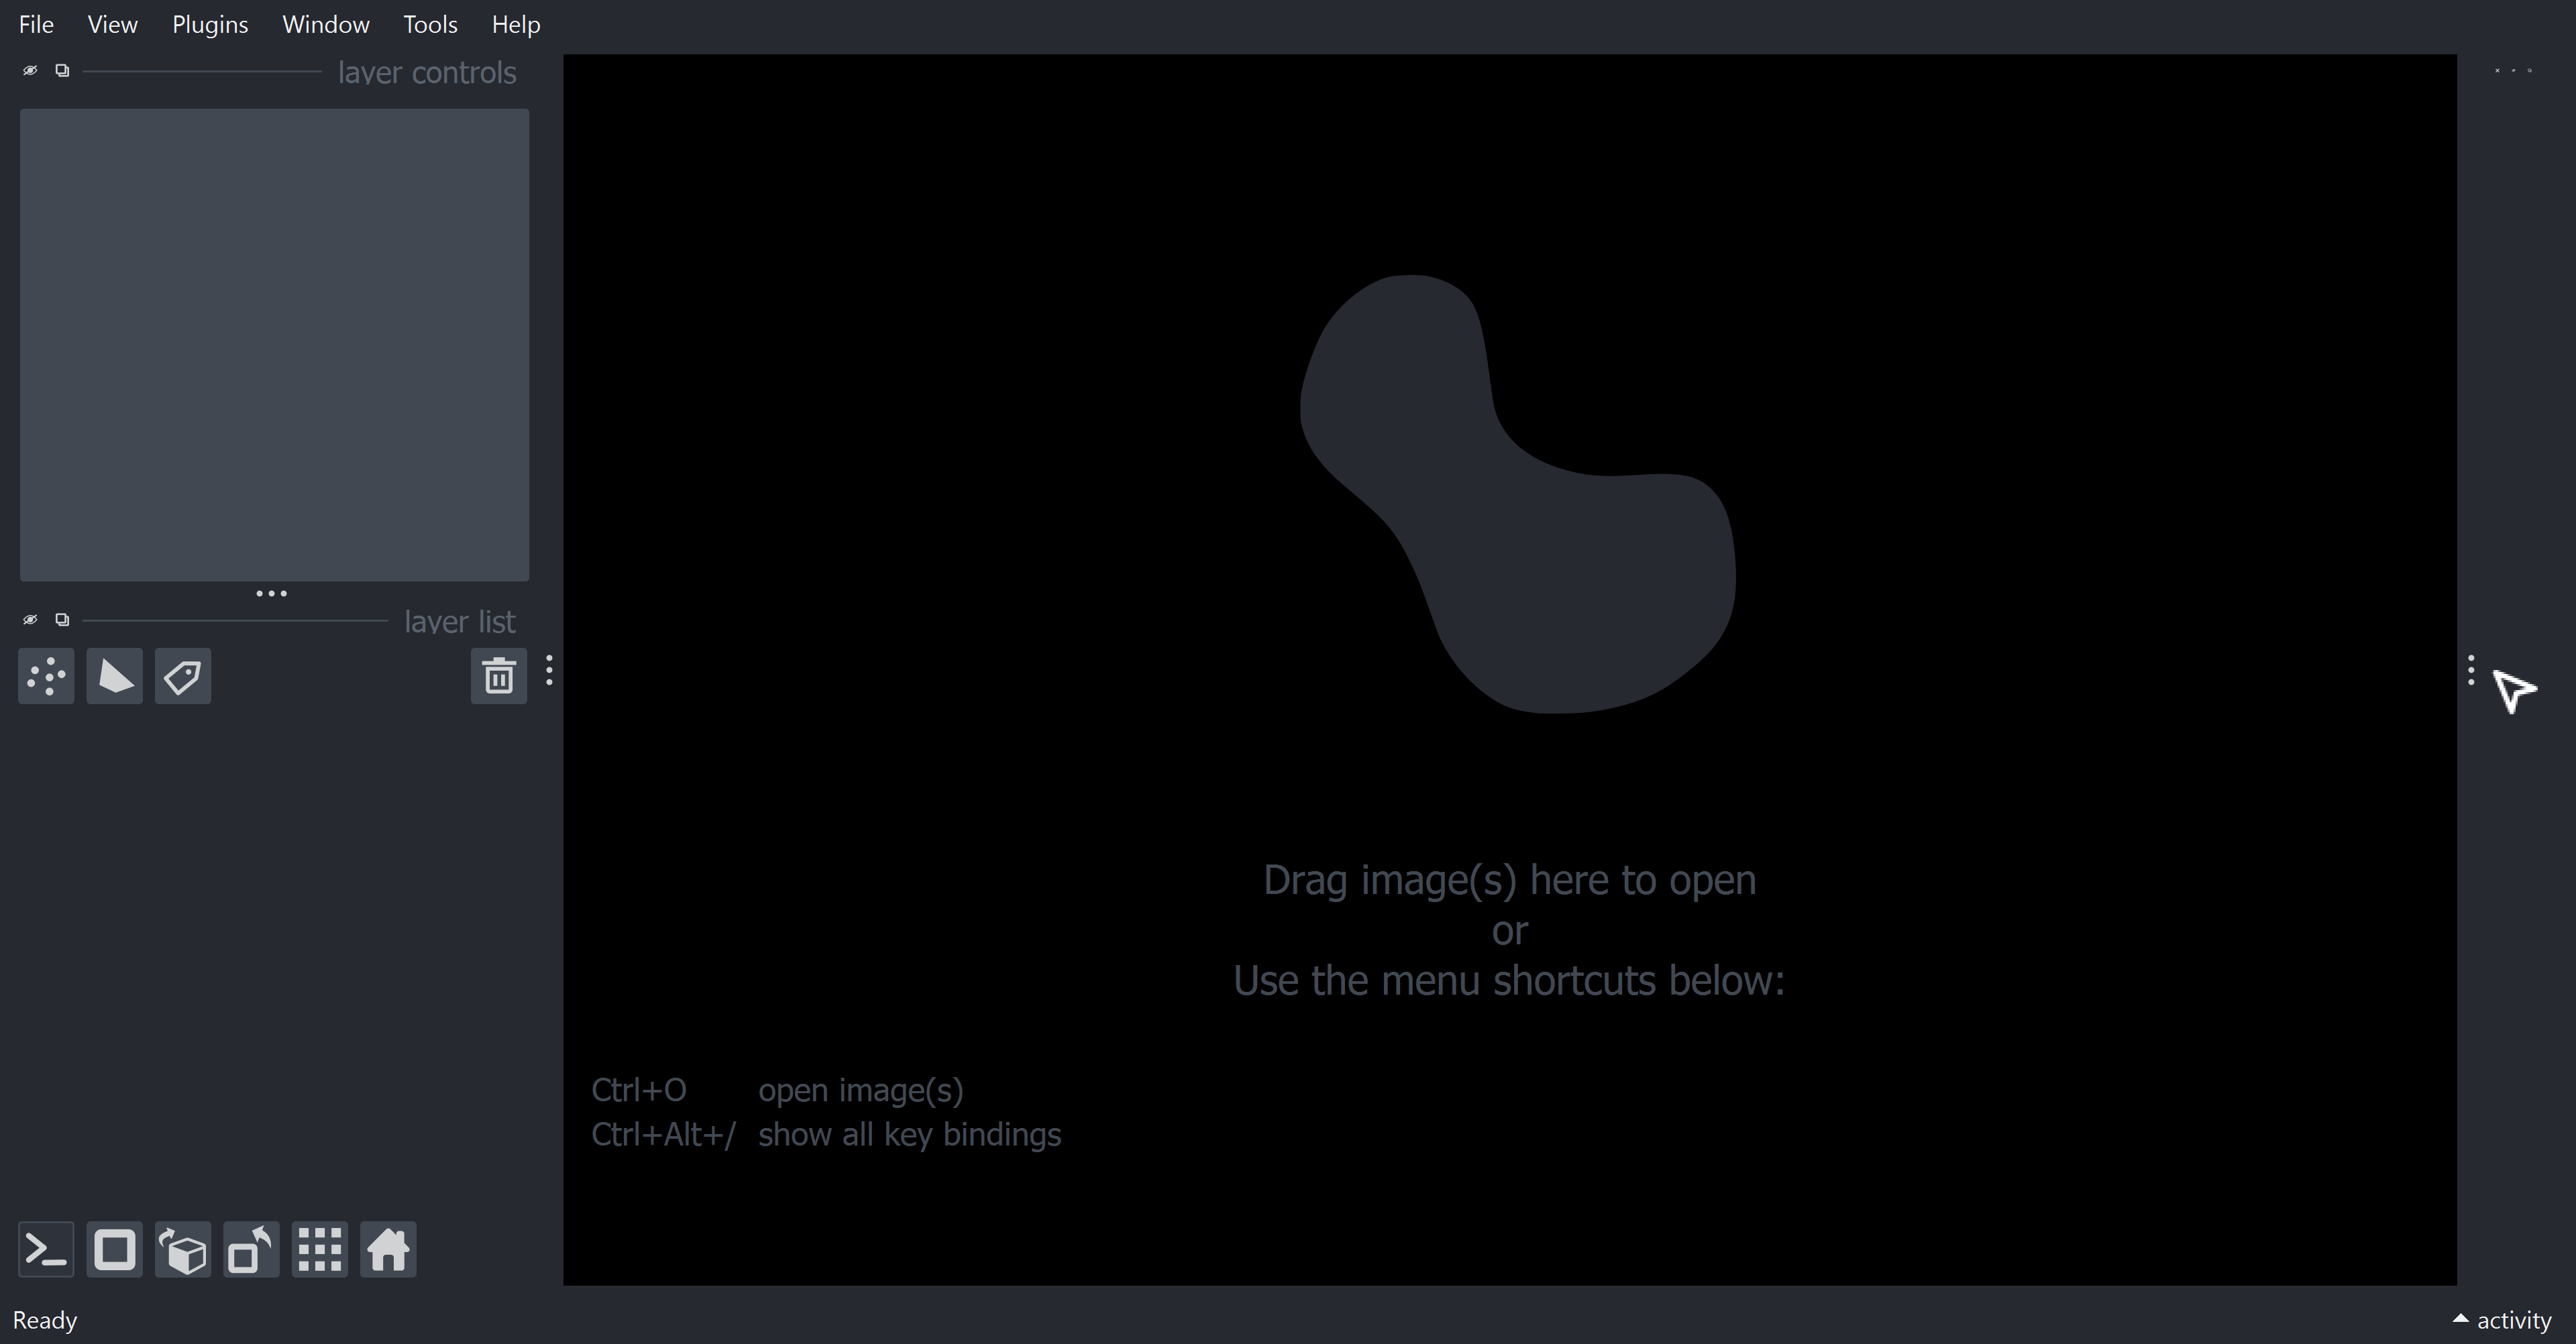

In [8]:
nbscreenshot(viewer)

Or insert/add to a plotter amde with pyqt

In [9]:
plotter.layout().insertWidget(2, custom_toolbar)

In [10]:

viewer.add_image(np.random.rand(20, 20))
viewer.window.add_dock_widget(plotter, area='right')


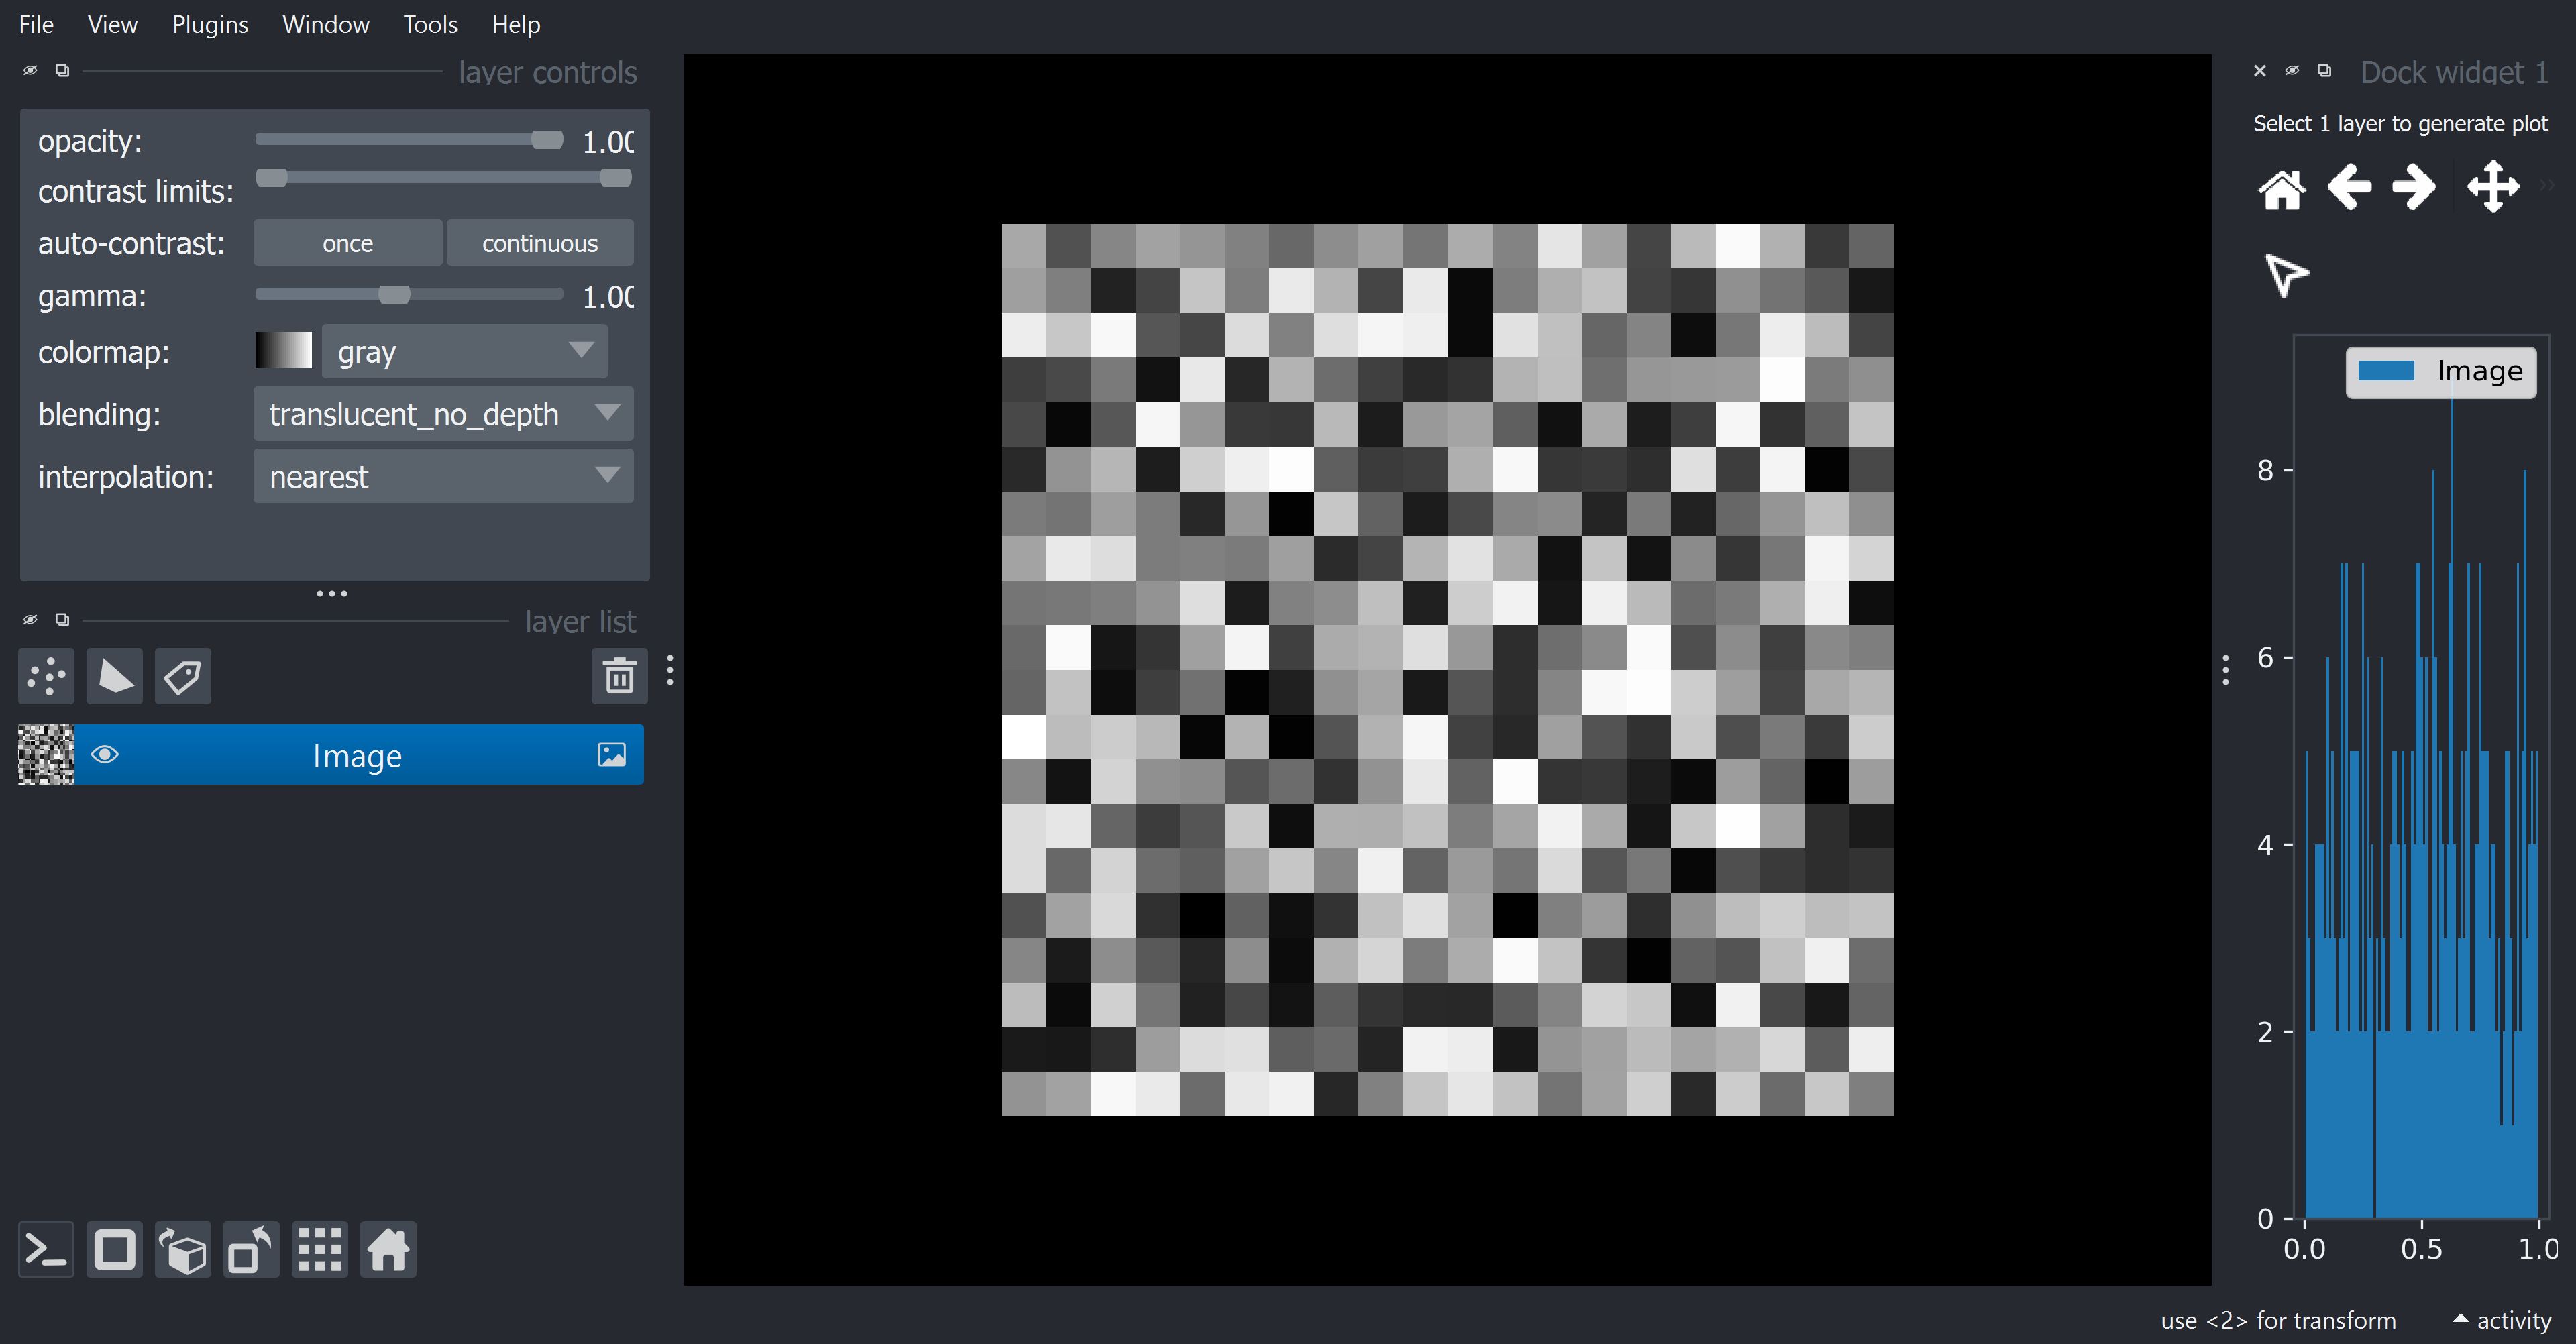

Selection Activated!
Selection Deactivated!


In [11]:
nbscreenshot(viewer)